In [8]:
import pandas as pd
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from scripts.preprocess_cpv import process_cpv_data

In [11]:
df = pd.read_csv('../data/train.csv', encoding='utf-8')

In [ ]:
df_cpv = process_cpv_data(df, levels=None, save_csv=True, output_path=None)


Step 1: Adding CPV descriptions...
Step 2: Adding CPV hierarchy columns...
Data saved successfully to: /Users/loicdogon/code/RonanB400/decp_ml/scripts/../data/data_cpv.csv
CPV processing completed successfully!


In [16]:
df_cpv.head()

,uid,id,nature,acheteur_id,titulaire_id,montant,codeCPV,procedure,dureeMois,dateNotification,...,origineUE,origineFrance,lieuExecution_code,lieuExecution_typeCode,idAccordCadre,codeCPV_FR,codeCPV_2,codeCPV_3,codeCPV_4,codeCPV_5
0,215706722000182024TH240,2024TH240,Marché,21570672200018,42153568300013,106866.59,45111291,Appel d'offres ouvert,23.0,2024-07-19,...,0.0,0.0,57100,Code postal,NaN,Travaux d'aménagement du terrain,45000000,45100000,45110000,45111000
1,200052090000122023ELECF8,2023ELECF8,Marché,20005209000012,53791596900134,6000000.00,45231400-9,Appel d'offres ouvert,36.0,2022-11-07,...,0.0,0.0,12032,Code postal,NaN,Travaux de construction de lignes électriques,45000000,45200000,45230000,45231000
2,200058519001132023-0202,2023-0202,Marché,20005851900113,42094822600048,2200000.00,45232410-9,Appel d'offres ouvert,12.0,2023-01-01,...,NaN,NaN,78230,Code postal,2023-0202,Travaux d'assainissement,45000000,45200000,45230000,45232000
3,239740012000122023602099,2023602099,Marché,23974001200012,50067844600047,2400000.00,71351810-4,Appel d'offres ouvert,48.0,2023-02-01,...,NaN,NaN,04,Code région,2023602099,Services topographiques,71000000,71300000,71350000,71351000
4,2631001250001620241941,20241941,Marché,26310012500016,77566225700150,2268857.60,33000000-0,Procédure adaptée,36.0,2024-05-29,...,0.0,0.0,76,Code région,NaN,"Matériels médicaux, pharmaceutiques et produit...",33000000,33000000,33000000,33000000


In [28]:
df_cpv['codeCPV_2'].nunique()

69

In [29]:
df_cpv['codeCPV_2'].value_counts()

codeCPV_2
45000000    97973
71000000    34079
79000000    10067
90000000     8470
33000000     6564
            ...  
99000000        2
05000000        2
21000000        2
54000000        1
13000000        1
Name: count, Length: 69, dtype: int64

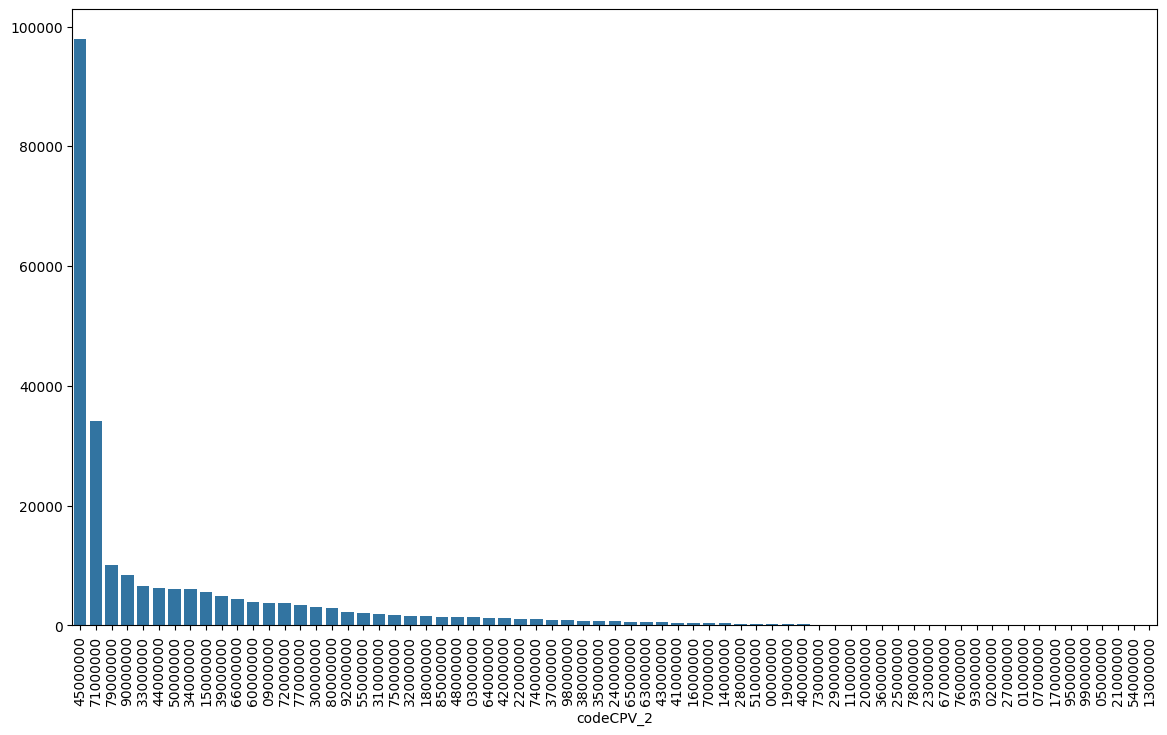

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

cpv_group_counts = df_cpv['codeCPV_2'].value_counts()

plt.figure(figsize=(14, 8))
sns.barplot(x=cpv_group_counts.index, y=cpv_group_counts.values, order=cpv_group_counts.sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='codeCPV_2'>

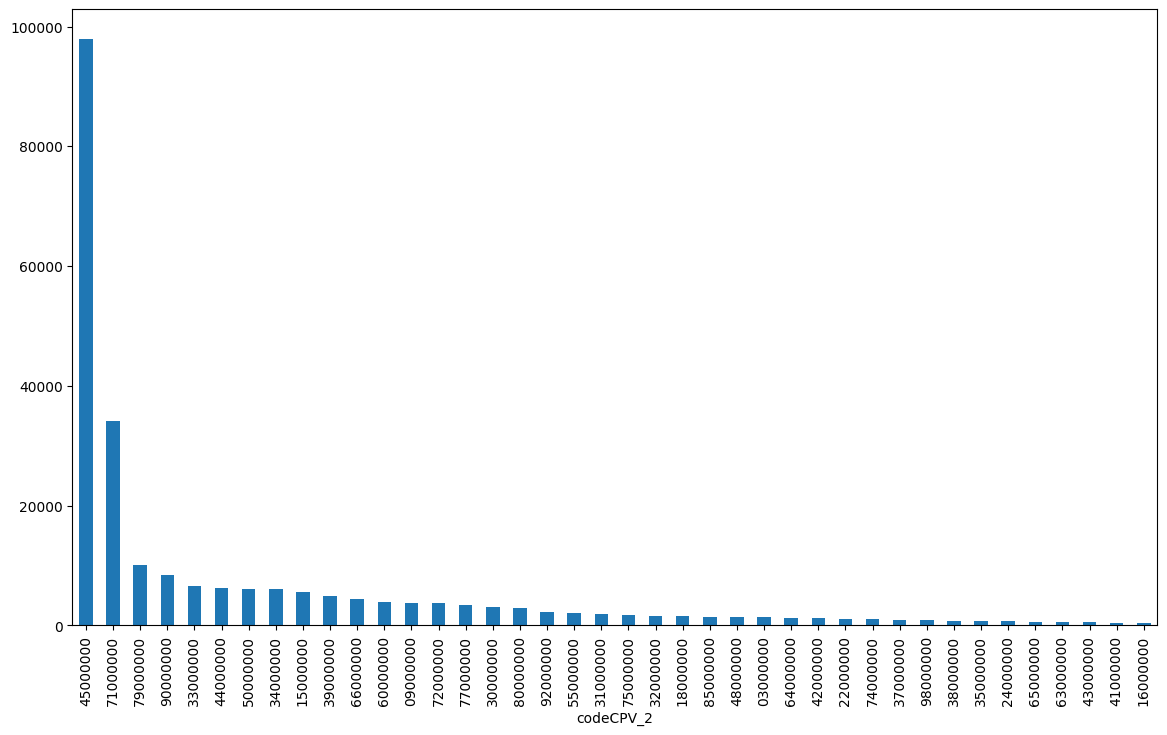

In [79]:
top_n = 40
top_groups = cpv_group_counts.nlargest(top_n)
top_groups.plot(kind='bar', figsize=(14, 8))

In [80]:
#On ne considère que 1000 par catégorie
top_groups.iloc[0]

97973

In [81]:
top_groups.iloc[-1]

419

In [82]:
df_cpv_top = df_cpv[df_cpv['codeCPV_2'].isin(top_groups.index)]


In [83]:
df_cpv_top['codeCPV_2'].value_counts()

codeCPV_2
45000000    97973
71000000    34079
79000000    10067
90000000     8470
33000000     6564
44000000     6164
50000000     6083
34000000     6076
15000000     5614
39000000     4960
66000000     4423
60000000     3818
09000000     3785
72000000     3781
77000000     3362
30000000     3126
80000000     2830
92000000     2194
55000000     2087
31000000     1862
75000000     1782
32000000     1542
18000000     1505
85000000     1395
48000000     1392
03000000     1378
64000000     1273
42000000     1209
22000000     1100
74000000     1033
37000000      903
98000000      826
38000000      761
35000000      752
24000000      678
65000000      606
63000000      522
43000000      517
41000000      442
16000000      419
Name: count, dtype: int64

In [84]:
df_cpv_top

,uid,id,nature,acheteur_id,titulaire_id,montant,codeCPV,procedure,dureeMois,dateNotification,...,origineUE,origineFrance,lieuExecution_code,lieuExecution_typeCode,idAccordCadre,codeCPV_FR,codeCPV_2,codeCPV_3,codeCPV_4,codeCPV_5
0,215706722000182024TH240,2024TH240,Marché,21570672200018,42153568300013,106866.59,45111291,Appel d'offres ouvert,23.0,2024-07-19,...,0.0,0.0,57100,Code postal,NaN,Travaux d'aménagement du terrain,45000000,45100000,45110000,45111000
1,200052090000122023ELECF8,2023ELECF8,Marché,20005209000012,53791596900134,6000000.00,45231400-9,Appel d'offres ouvert,36.0,2022-11-07,...,0.0,0.0,12032,Code postal,NaN,Travaux de construction de lignes électriques,45000000,45200000,45230000,45231000
2,200058519001132023-0202,2023-0202,Marché,20005851900113,42094822600048,2200000.00,45232410-9,Appel d'offres ouvert,12.0,2023-01-01,...,NaN,NaN,78230,Code postal,2023-0202,Travaux d'assainissement,45000000,45200000,45230000,45232000
3,239740012000122023602099,2023602099,Marché,23974001200012,50067844600047,2400000.00,71351810-4,Appel d'offres ouvert,48.0,2023-02-01,...,NaN,NaN,04,Code région,2023602099,Services topographiques,71000000,71300000,71350000,71351000
4,2631001250001620241941,20241941,Marché,26310012500016,77566225700150,2268857.60,33000000-0,Procédure adaptée,36.0,2024-05-29,...,0.0,0.0,76,Code région,NaN,"Matériels médicaux, pharmaceutiques et produit...",33000000,33000000,33000000,33000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239731,256701152000252024S0055MPAOC,2024S0055MPAOC,Marché,25670115200025,50217952600038,50400.00,72500000-0,Procédure adaptée,12.0,2024-03-01,...,NaN,NaN,44,Code région,2023S0156MAOOC,Services informatiques,72000000,72500000,72500000,72500000
239732,216901231000112023O4484,2023O4484,Marché,21690123100011,30389008100126,440742.36,45262660-5,Appel d'offres ouvert,9.0,2023-01-12,...,NaN,NaN,69123,Code commune,NaN,Travaux de désamiantage,45000000,45200000,45260000,45262000
239733,211202965000112024001L06,2024001L06,Marché,21120296500011,53920081600012,77221.40,45421000-4,Procédure adaptée,16.0,2024-02-28,...,NaN,NaN,12490,Code postal,NaN,Travaux de menuiserie,45000000,45400000,45420000,45421000
239734,2113010070001220240701,20240701,Marché,21130100700012,32344748200015,212125.00,45262512,Procédure adaptée,24.0,2024-04-22,...,0.0,0.0,13210,Code postal,NaN,Maçonnerie de pierres de taille,45000000,45200000,45260000,45262000
